In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

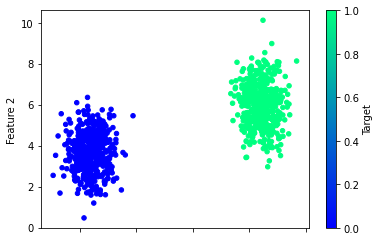

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#Creating a dataframe with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
#Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

2022-02-22 16:45:49.325295: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Add our first dense layer, inlcuding our input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.6649 - accuracy: 0.9427
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.9960
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6380 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6237 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5937 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5621 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 1.0000
Epoch 93/100


<AxesSubplot:>

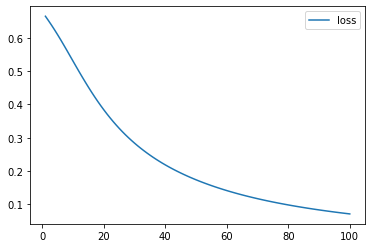

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

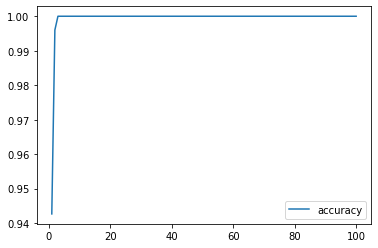

In [12]:
#Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0724 - accuracy: 1.0000 - 229ms/epoch - 29ms/step
Loss: 0.07242562621831894, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

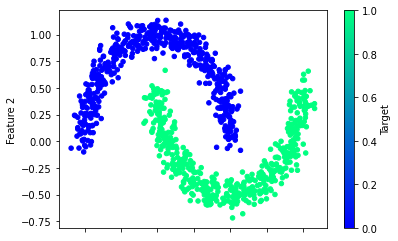

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Creating a dataframe to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9649 - accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8457 - accuracy: 0.5453
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7628 - accuracy: 0.5693
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.5827
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6594 - accuracy: 0.6013
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.6213
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.6373
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.6520
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.6613
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5233 - accuracy: 0.6747
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2614 - accuracy: 0.8893
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.8893
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2607 - accuracy: 0.8893
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.8893
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2602 - accuracy: 0.8893
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.8893
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.8893
Epoch 91/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2590 - accuracy: 0.8907
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.8893
Epoch 93/100


<AxesSubplot:>

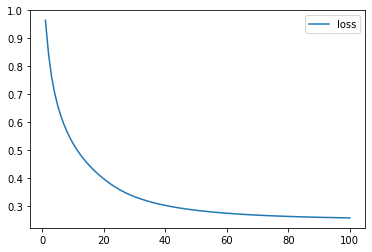

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

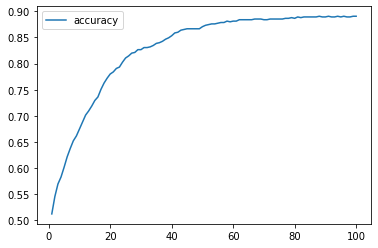

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")